# Cluster Number and Size Examination

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('./..')



import h5py
import glob
import re

from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from cmcrameri import cm
import numpy as np
import seaborn as sns
import pandas as pd

from src.utils import get_ds_iters, get_cluster_labels
from src.plot_utils import get_plot_configs

## Get Biggest Cluster + Cluster Count Details

In [2]:
densities = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
tumbles = np.logspace(-6, -1, 10, base=2)
num = []
big = []
ds = []
ts = []

for idx, d in enumerate(densities):
    for jdx, t in enumerate(tumbles):
        file = f"../data/no-rolling/dataset_tumble_{t:.3f}_density_{d}.h5"
        for idx2 in range(500,1000,1):
            ds.append(d)
            ts.append(t)
            labelled, nlabels = get_cluster_labels(file, idx2)
            lb = labelled.flatten()
            big.append(np.max(np.bincount(lb)[1:]))
            num.append(nlabels)

## Create Dataframe Storage 

In [3]:
df = pd.DataFrame()
df.insert(0, "alpha", ts,300)
df.insert(1, "numclus", num)
df.insert(2, "bigsize", big)
df.insert(0, "density", ds,300)

df.to_csv("cache/cluster_count_size.csv")

## Plot Results

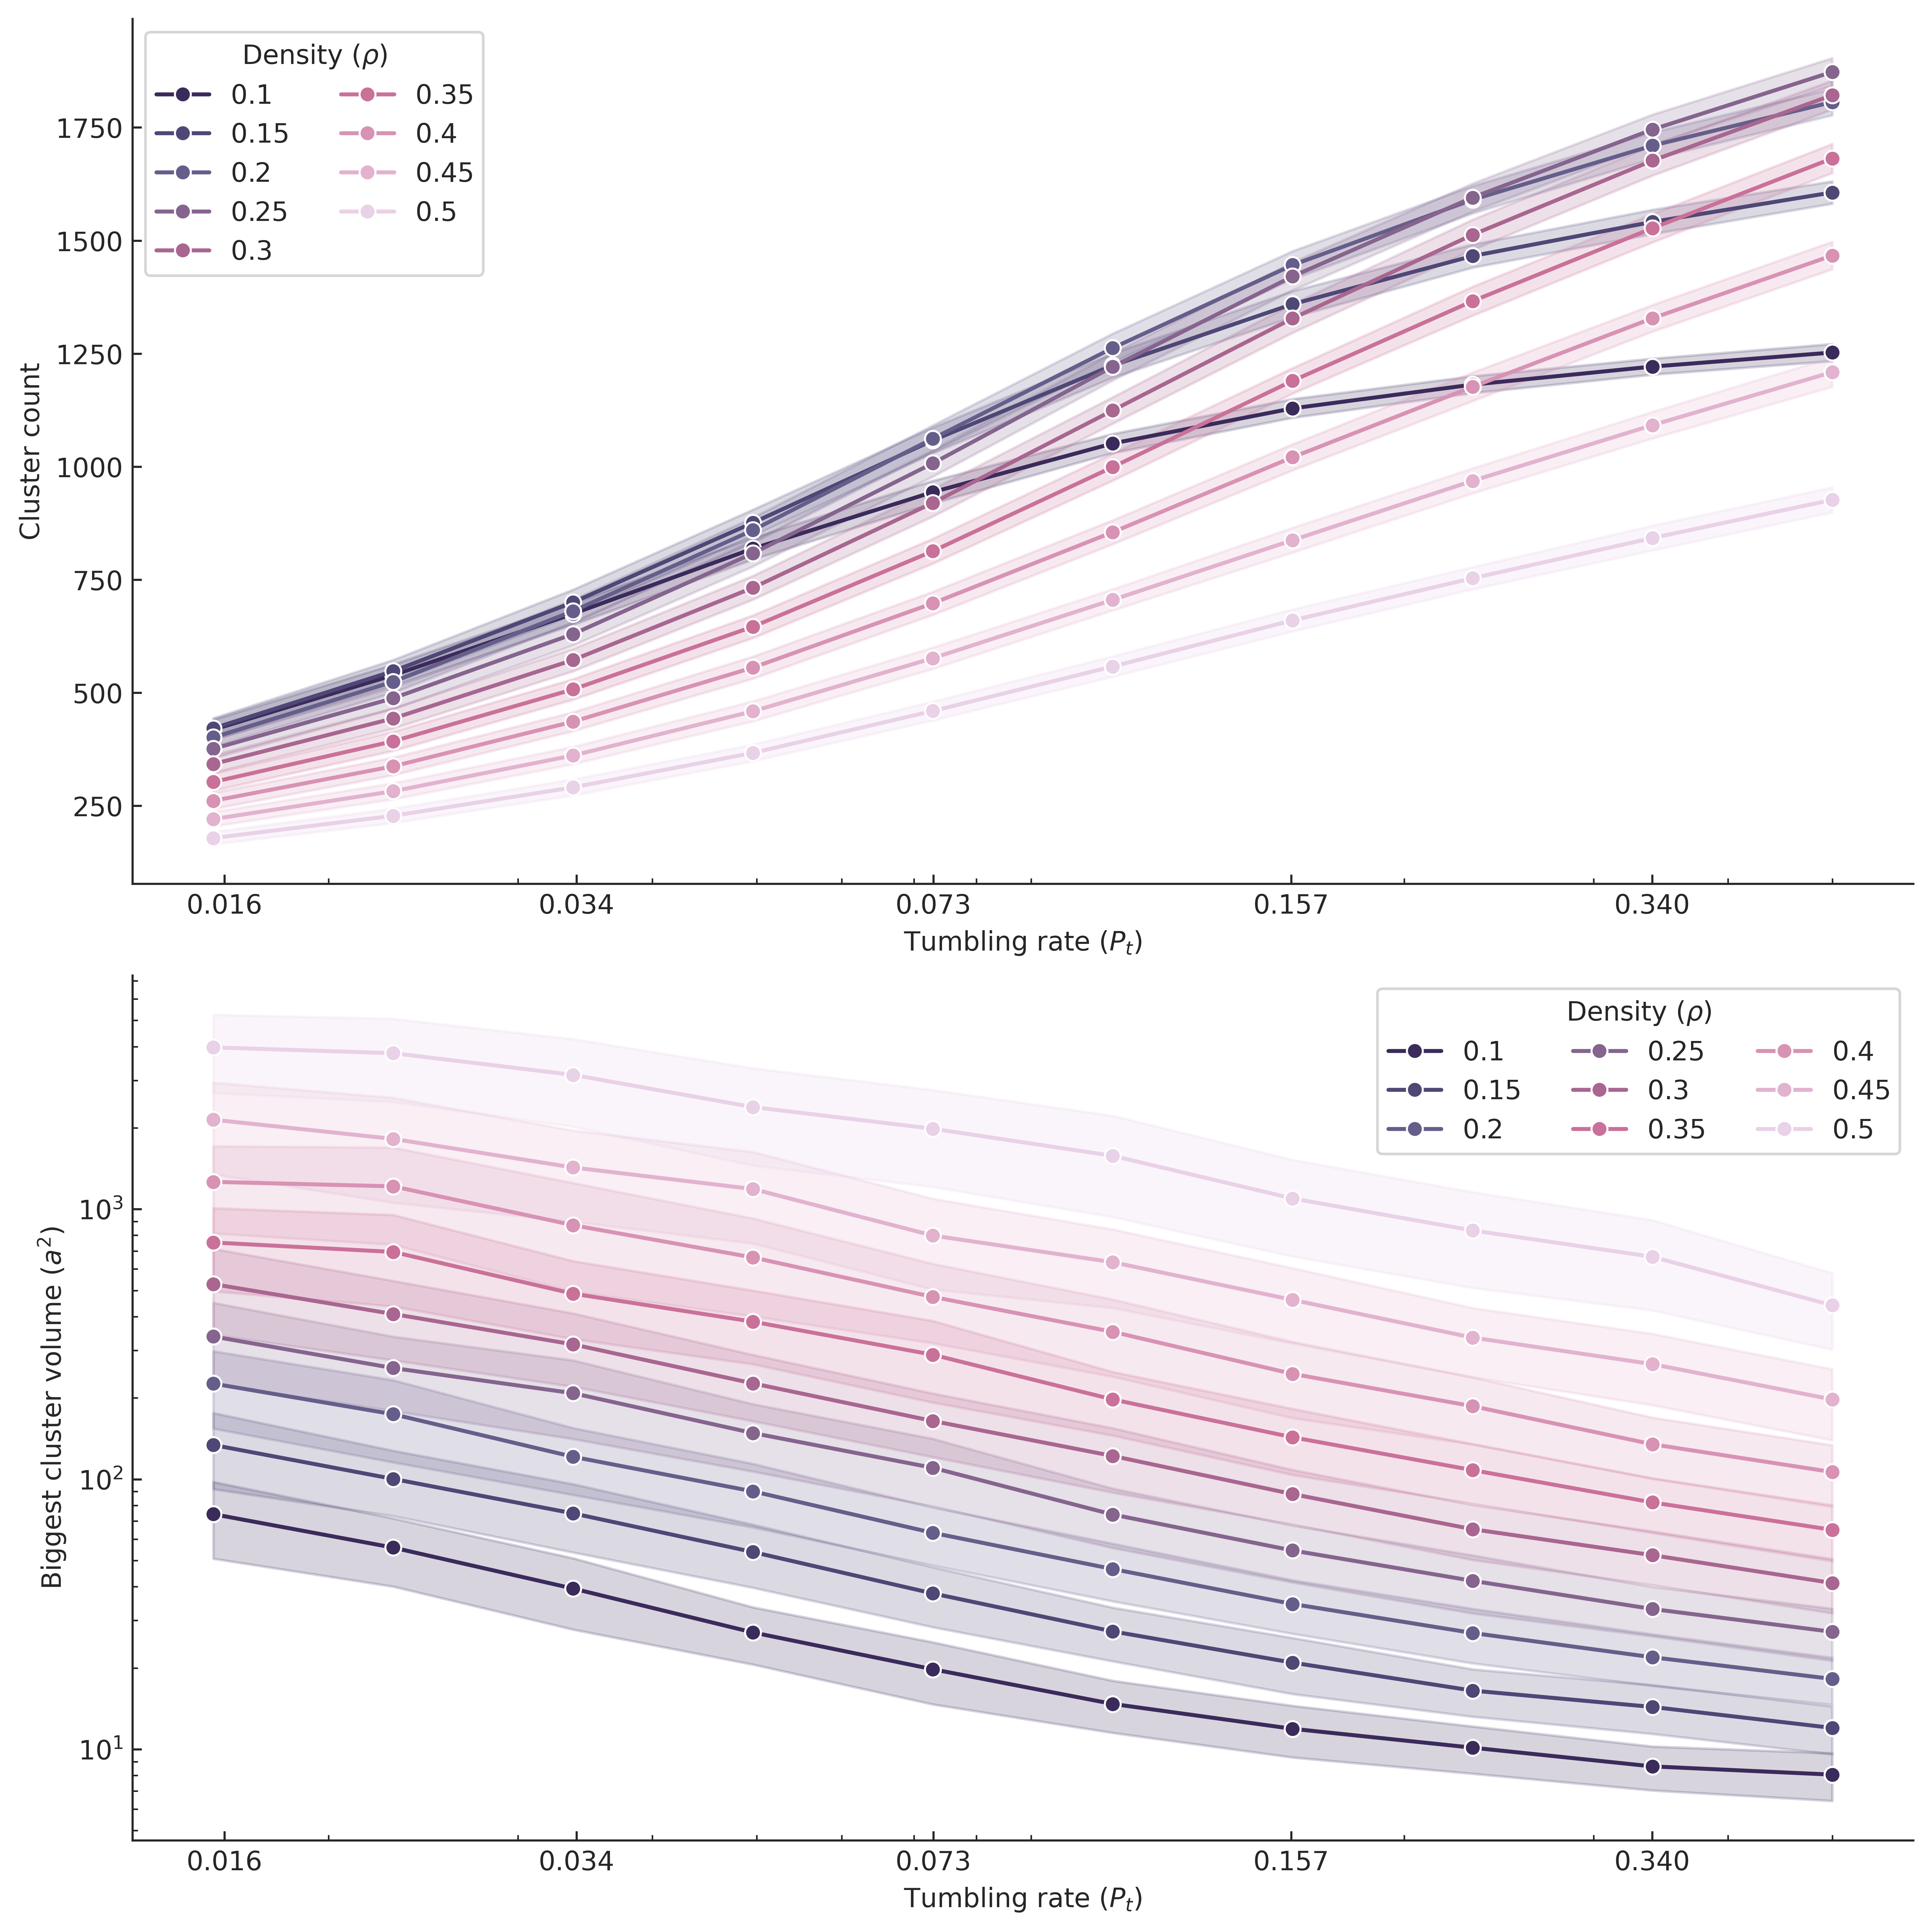

In [5]:
tumbles = np.logspace(-6, -1, 10, base=2)
df = pd.read_csv("cache/cluster_count_size.csv")
df["density"] = ["$%s$" % x for x in df["density"]] #this is a rough fix for the sns hue not working properly when fed floats (we fix it by forcing the floats into a latex string; a regular string would yield the same problem!)
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

fig, axes = plt.subplots(
    2,
    1,
    figsize=(10, 10),
    constrained_layout=True,
    dpi=600
)

ax1 = sns.lineplot(ax=axes[0], data=df, x="alpha", y="numclus", errorbar='sd', marker='o', hue="density", palette="cmc.acton")
ax2 = sns.lineplot(ax=axes[1], data=df, x="alpha", y="bigsize", errorbar='sd', marker='o', hue="density", palette="cmc.acton")

ax1.set_ylabel("Cluster count")
ax2.set_ylabel(r"Biggest cluster volume ($a^2$)")

for ax in axes:
    ax.set_xscale('log')
    ax.set_xlabel(r"Tumbling rate ($P_t$)")
    ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    ax.set_xticks(np.round(tumbles,3)[::2])

ax2.set_yscale('log')
sns.move_legend(ax1, "upper left", title=r"Density ($\rho$)",ncols=2)
sns.move_legend(ax2, "upper right", title=r"Density ($\rho$)",ncols=3)
sns.despine()
plt.show()

fig.savefig("../plots/cluster_count_size.pdf")